In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import platform
import pathlib

In [113]:
## Paths Input Here
analysis = '1_way_anova/lobe_damage_scores_csf'
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_PD_DBS_STN_WURZBURG/damage_scores/all_patient_damage_scores_csf.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = os.path.join(os.path.dirname(conn_path), f'{analysis}')
    print('I will save to:', out_dir)
    x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\stats'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')
    
## Do you want to save the reults?
save = True
if save:
    if os.path.exists(out_dir) != True:
        os.makedirs(out_dir)

I will save to: /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_PD_DBS_STN_WURZBURG/damage_scores/1_way_anova/lobe_damage_scores_csf
I have set pathnames in the Mac style


## Import Dataframe

In [118]:
data_df = pd.read_csv(conn_path)

#Prepare the dataframe for statsmodels
data_df = data_df.reset_index(drop=True)
# data_df.dropna(inplace=True)
try:
    data_df.pop('Unnamed: 0')
    data_df.pop('% Change from baseline (CDR)')
except:
    print('none to pop')
data_df = data_df.rename(columns={'% Change from baseline (ADAS-Cog11)': 'percent_change_adascog11'})#, '07_default': 'default', '02_somatomotor_seed': 'somatomotor', '03_dorsal_attention': 'dorsal', '01_visual_seed': 'visual', '04_ventral_attention': 'ventral', '05_limbic': 'limbic', '06_frontoparietal': 'frontoparietal'})
display(data_df)

none to pop


,Temporal,Frontal,Parietal,Cerebellum,Insula,Occipital
0,472.487124,958.390830,366.988690,282.665332,55.130112,140.192637
1,696.144933,1448.335226,1112.041596,318.134118,79.158434,373.310456
2,120.651260,1466.726209,1726.595360,199.554213,22.584655,167.183511
3,143.870409,2376.407850,1507.469193,142.528731,2.146887,301.018042
4,907.807041,3904.159617,2286.180451,383.139018,108.219368,448.450924
5,82.625535,805.692949,1630.582140,144.448107,4.114078,157.250523
6,303.518685,1755.236150,1636.711165,247.494243,18.356025,303.268076
7,303.555363,2594.324173,2440.081159,554.025725,13.598295,289.470552
8,926.904048,2708.299238,3319.922837,547.584778,117.669121,914.870465
9,357.812116,1210.376178,248.597269,215.780773,98.523630,57.600763


In [119]:
# Clean Dataframe
index_of_first_column_to_include = 0
group_variable = 'Lobe'
independent_variable = 'Damage Score'
#----------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
try:
    data_df = data_df.copy().iloc[:, index_of_first_column_to_include:]
    names = data_df.columns.to_list()
    data_df.columns = [name.split('_')[1].replace('_', ' ').capitalize() for name in names]
    data_df
except:
    pass

In [120]:
#USE IF YOU MUST UNMELT THE DATAFRAME
# column = None
# values = None
# #----------------------------------------------------------------DO NOT TOUCH
# df_unmelted = data_df.pivot(index=None, columns=column, values=values)
# data_df = df_unmelted
# display(df_unmelted)

## Massage Dataframe for ANOVA

## ANOVA Test Time

In [121]:
index_of_first_column_to_include = 0
#----------------------------------------------------------------DO NOT TOUCH
#Generate string to enter into ANOVA
def remove_apostrophes(input_string):
    return input_string.replace("'", "")

columns_string = data_df.columns.values.tolist()[index_of_first_column_to_include:]
data_df_string = []
for i in range(0, len(columns_string)):
    name = f'data_df["{columns_string[i]}"]'
    data_df_string.append(name)
    
encapsulated_string = str(data_df_string)
encapsulated_string = encapsulated_string.replace("'", "")
print('Here is a list to set up the ANOVA')
print(encapsulated_string)

Here is a list to set up the ANOVA
[data_df["Temporal"], data_df["Frontal"], data_df["Parietal"], data_df["Cerebellum"], data_df["Insula"], data_df["Occipital"]]


In [123]:
#Begin the ANOVA
from scipy.stats import f_oneway
# box_df = melted_df.copy()
# names = data_df.columns.values.tolist()[1:]

##----------------------------------------------------------------COPY THE STRING PRINTED ABOVE INTO HERE----------------------------------------------------------------
fvalue, pvalue = f_oneway(
data_df["Temporal"], data_df["Frontal"], data_df["Parietal"], data_df["Cerebellum"], data_df["Insula"], data_df["Occipital"]
)
##----------------------------------------------------------------END COPYIN--------------------------------------------------------
    #box_df['mem'], box_df['vis'], box_df['som'], box_df['dor'], box_df['ven'], 
                        #   box_df['lim'], box_df['fro'], box_df['def'])

results_df = pd.DataFrame({'ANOVA f-value': fvalue, 'ANOVA p-value': pvalue}, index=['stat'])
display(results_df)

,ANOVA f-value,ANOVA p-value
stat,44.580195,2.155101e-30


In [124]:
# melted_df.to_csv(os.path.join(out_dir, ('descrptive_stats_of_inputs.csv')))
results_df.to_csv(os.path.join(out_dir, 'anova_results.csv'))
print(f'saved to: \n {out_dir}')

saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_PD_DBS_STN_WURZBURG/damage_scores/1_way_anova/lobe_damage_scores_csf


## Perform Post Hoc Testing

In [125]:

#----------------------------------------------------------------DO NOT TOUCH----------------------------------------------------------------
# # Prep Dataframe
df_to_melt = data_df.copy().transpose()
df_to_melt[group_variable] = df_to_melt.index.to_list()
df_to_melt
melted_df = pd.melt(df_to_melt, id_vars=[group_variable], value_vars=df_to_melt.columns.values.tolist()[0:-1], value_name=independent_variable)
display(melted_df)

,Lobe,variable,Damage Score
0,Temporal,0,472.487124
1,Frontal,0,958.390830
2,Parietal,0,366.988690
3,Cerebellum,0,282.665332
4,Insula,0,55.130112
...,...,...,...
193,Frontal,32,2944.789661
194,Parietal,32,1432.925539
195,Cerebellum,32,257.334933
196,Insula,32,157.501066


In [126]:
#Perform posthoc
from scikit_posthocs import posthoc_tukey

tukey_df = posthoc_tukey(melted_df, val_col=independent_variable, group_col=group_variable)
display(tukey_df)

,Temporal,Frontal,Parietal,Cerebellum,Insula,Occipital
Temporal,1.0000,0.001000,0.001000,0.900000,0.329300,0.900000
Frontal,0.0010,1.000000,0.003122,0.001000,0.001000,0.001000
Parietal,0.0010,0.003122,1.000000,0.001000,0.001000,0.001000
Cerebellum,0.9000,0.001000,0.001000,1.000000,0.733698,0.900000
Insula,0.3293,0.001000,0.001000,0.733698,1.000000,0.836171
Occipital,0.9000,0.001000,0.001000,0.900000,0.836171,1.000000


<AxesSubplot: >

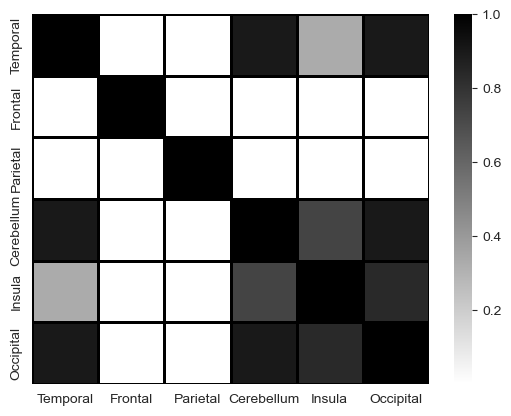

In [127]:
tukey_sig_is_one_df = tukey_df.copy()
tukey_sig_is_one_df.where(tukey_sig_is_one_df > 0.05, 1)
# tukey_sig_is_one_df[(tukey_sig_is_one_df > 0.05)] = 0
# tukey_sig_is_one_df[(tukey_sig_is_one_df < 0.05)] = 1
# sns.clustermap(tukey_sig_is_one_df, cmap='rocket_r')
sigplot = plt.figure()
sns.heatmap(tukey_sig_is_one_df, cmap='binary', linewidth=2.0, linecolor='k')

In [128]:
#Save the Tukey Information
if save:
    if os.path.isdir(out_dir) != True:
        os.mkdir(out_dir)
    tukey_df.to_csv(os.path.join(out_dir, ('posthoc_tukey_dataframe.csv')))
    sigplot.savefig(os.path.join(out_dir, ('posthoc_tukey_significance_plot.png')))
    print(f'saved to: \n {out_dir}')

saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_PD_DBS_STN_WURZBURG/damage_scores/1_way_anova/lobe_damage_scores_csf


In [129]:
#prepare to plot hte post-hoc analysis
#remove redundant component of matrix and drop NANs, then melt the DF.
from natsort import natsort_keygen, order_by_index, index_natsorted
remove = np.tril(np.ones(tukey_df.shape), k=0).astype('bool')
tukey_df[remove] = np.nan
molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()

#----------------------------------------------------------------Organize the Datafram--------------------------------
# create a new column that contains the position of each value within its group
# melted_df['position'] = melted_df.groupby('id').cumcount()

# # sort the dataframe by the group column and the new position column
# melted_df = melted_df.sort_values(['id', 'position'])

# # drop the position column
# melted_df = melted_df.drop(columns=['position'])

# molten_df = molten_df.reindex(index=order_by_index(molten_df.index, index_natsorted(molten_df.variable)))
molten_df

,index,variable,value
6,Temporal,Frontal,0.001000
12,Temporal,Parietal,0.001000
13,Frontal,Parietal,0.003122
18,Temporal,Cerebellum,0.900000
19,Frontal,Cerebellum,0.001000
20,Parietal,Cerebellum,0.001000
24,Temporal,Insula,0.329300
25,Frontal,Insula,0.001000
26,Parietal,Insula,0.001000
27,Cerebellum,Insula,0.733698


['Cerebellum', 'Frontal', 'Insula', 'Occipital', 'Parietal', 'Temporal']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Parietal vs. Temporal: Custom statistical test, P_val:1.000e-03
Cerebellum vs. Frontal: Custom statistical test, P_val:1.000e-03
Frontal vs. Insula: Custom statistical test, P_val:1.000e-03
Occipital vs. Parietal: Custom statistical test, P_val:1.000e-03
Insula vs. Parietal: Custom statistical test, P_val:1.000e-03
Frontal vs. Occipital: Custom statistical test, P_val:1.000e-03
Frontal vs. Parietal: Custom statistical test, P_val:3.122e-03
Frontal vs. Temporal: Custom statistical test, P_val:1.000e-03
Cerebellum vs. Parietal: Custom statistical test, P_val:1.000e-03


Text(141.22222222222223, 0.5, 'Damage Score')

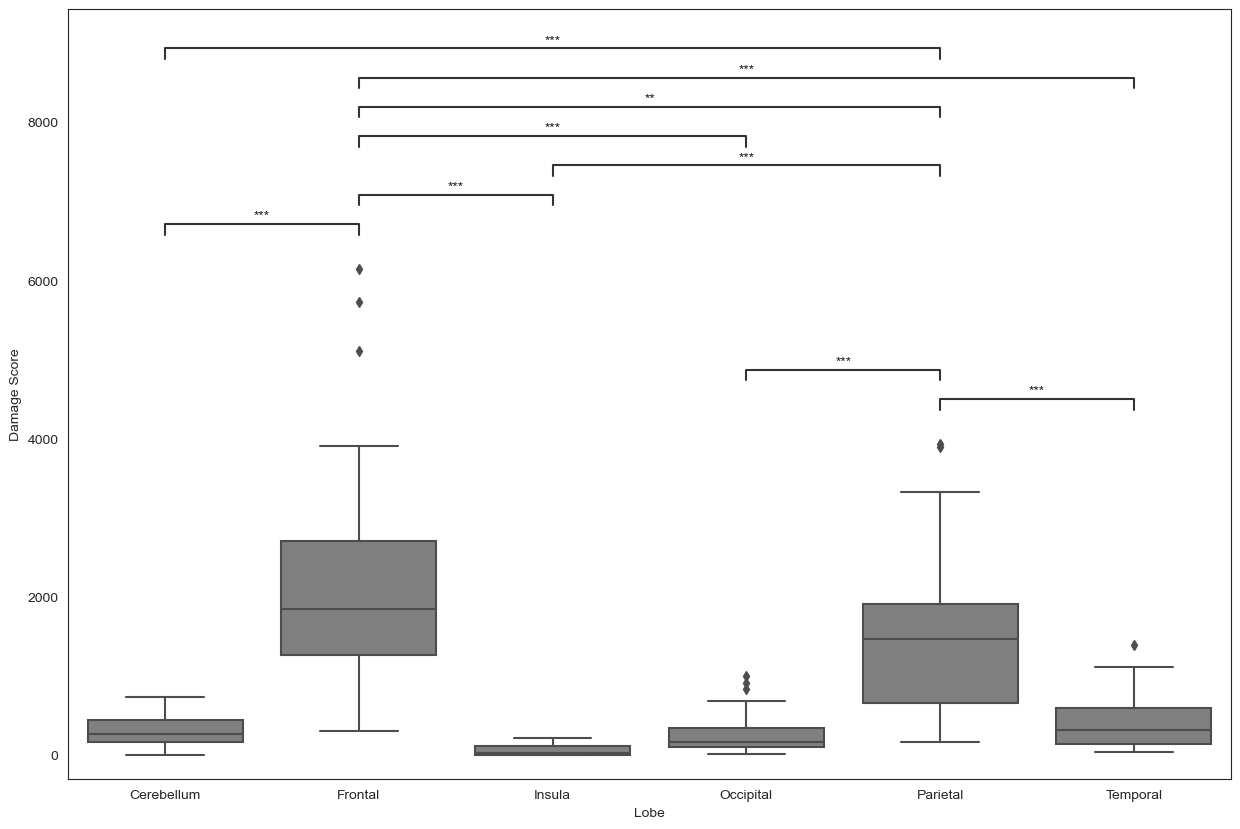

In [130]:
from statannotations.Annotator import Annotator
from natsort import natsort
#----------------------------------------------------------------Organize the Figure
# define the value you want to move the rows afte
order = natsort.natsorted(np.unique(melted_df[group_variable]))
print(order)

#----------------------------------------------------------------Identify Values and Annotate
#Extract information from the melted dataframe above
pairs = [(i[1]["index"], i[1]["variable"]) for i in molten_df.iterrows()]
p_values = [i[1]["value"] for i in molten_df.iterrows()]

# Identify only nonsignificant pairs
only_nonsig = False
if only_nonsig:
    ns_vals = []
    ns_pairs = []
    for i in range(0, len(p_values)):
        if p_values[i] > 0.05:
            ns_vals.append(p_values[i])
            ns_pairs.append(pairs[i])
    pairs = ns_pairs
    p_values = ns_vals

#Identify only significant pairs
only_sig = True
if only_sig:
    s_vals = []
    s_pairs = []
    for i in range(0, len(p_values)):
        if p_values[i] < 0.05:
            s_vals.append(p_values[i])
            s_pairs.append(pairs[i])
    pairs = s_pairs
    p_values = s_vals

#----------------------------------------------------------------Plot
#Create the plot
sns.set_style('white')
fig = plt.figure(figsize=(15,10))
variable = np.unique(melted_df[group_variable])
ax = sns.boxplot(data=melted_df, x=group_variable, y=independent_variable, order=order, color='grey')

annotator = Annotator(ax, pairs, data=melted_df, x=group_variable, y=independent_variable, order=order)

annotator.configure(text_format="star", loc="inside")
annotator.set_pvalues_and_annotate(p_values)

ax.set_xlabel(group_variable)
ax.set_ylabel(independent_variable)

In [131]:
# Save outcomes
if save:
    if os.path.isdir(out_dir) != True:
        os.mkdir(out_dir)
    fig.savefig(os.path.join(out_dir, ('annotated_boxplot.png')))
    print(f'saved to: \n {out_dir}')

saved to: 
 /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_PD_DBS_STN_WURZBURG/damage_scores/1_way_anova/lobe_damage_scores_csf


In [111]:
print(melted_df.iloc[50:200, :])

        Cohort variable  Z Scored Volume
50   Alzheimer       16        -0.269528
51   Parkinson       17        -1.780761
52     Control       17         1.438440
53   Alzheimer       17         1.067524
54   Parkinson       18        -0.594393
..         ...      ...              ...
195  Parkinson       65              NaN
196    Control       65         0.422493
197  Alzheimer       65              NaN
198  Parkinson       66              NaN
199    Control       66        -0.648590

[150 rows x 3 columns]
